VGG-16 AND MOBILENET

## Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet, VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet import preprocess_input


In [2]:
def load_preprocess(dir, label, preprocess_func):
    images = []
    labels = []
    for file in os.listdir(dir):
        img = load_img(os.path.join(dir, file), target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = preprocess_func(img_array)  
        images.append(img_array)
        labels.append(label)

    return np.array(images), np.array(labels)

healthy_dir = 'Healthy'
unhealthy_dir = 'Unhealthy'

healthy_images, healthy_labels = load_preprocess(healthy_dir, 1, preprocess_input)
unhealthy_images, unhealthy_labels = load_preprocess(unhealthy_dir, 0, preprocess_input)

X = np.concatenate((healthy_images, unhealthy_images), axis=0)
y = np.concatenate((healthy_labels, unhealthy_labels), axis=0)


In [3]:
def mobilenet():
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

mobilenet_model = mobilenet()


In [4]:
mobilenet_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
mobilenet_history = mobilenet_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


22/22 [==============================] - 31s 866ms/step - loss: 0.4203 - accuracy: 0.8003 - val_loss: 0.2574 - val_accuracy: 0.8786
Epoch 2/10
22/22 [==============================] - 14s 633ms/step - loss: 0.1449 - accuracy: 0.9493 - val_loss: 0.1632 - val_accuracy: 0.9538
Epoch 3/10
22/22 [==============================] - 14s 638ms/step - loss: 0.0751 - accuracy: 0.9870 - val_loss: 0.1033 - val_accuracy: 0.9595
Epoch 4/10
22/22 [==============================] - 13s 611ms/step - loss: 0.0459 - accuracy: 0.9942 - val_loss: 0.0865 - val_accuracy: 0.9653
Epoch 5/10
22/22 [==============================] - 15s 687ms/step - loss: 0.0304 - accuracy: 0.9986 - val_loss: 0.0787 - val_accuracy: 0.9769
Epoch 6/10
22/22 [==============================] - 13s 581ms/step - loss: 0.0217 - accuracy: 1.0000 - val_loss: 0.0779 - val_accuracy: 0.9769
Epoch 7/10
22/22 [==============================] - 11s 522ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.0728 - val_accuracy: 0.98

In [8]:
def vgg16():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

vgg16_model = vgg16()


In [9]:
vgg16_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [10]:
vgg16_history = vgg16_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
22/22 [==============================] - 83s 4s/step - loss: 0.6530 - accuracy: 0.5847 - val_loss: 0.5470 - val_accuracy: 0.7688
Epoch 2/10
22/22 [==============================] - 109s 5s/step - loss: 0.5233 - accuracy: 0.7569 - val_loss: 0.4773 - val_accuracy: 0.7977
Epoch 3/10
22/22 [==============================] - 100s 5s/step - loss: 0.4424 - accuracy: 0.8263 - val_loss: 0.4227 - val_accuracy: 0.7977
Epoch 4/10
22/22 [==============================] - 101s 5s/step - loss: 0.3911 - accuracy: 0.8582 - val_loss: 0.3717 - val_accuracy: 0.8382
Epoch 5/10
22/22 [==============================] - 96s 4s/step - loss: 0.3456 - accuracy: 0.8871 - val_loss: 0.3395 - val_accuracy: 0.8497
Epoch 6/10
22/22 [==============================] - 93s 4s/step - loss: 0.3098 - accuracy: 0.8886 - val_loss: 0.3451 - val_accuracy: 0.8208
Epoch 7/10
22/22 [==============================] - 92s 4s/step - loss: 0.2788 - accuracy: 0.9117 - val_loss: 0.2961 - val_accuracy: 0.8844
Epoch 8/10
22/22 

In [11]:
mobilenet_test_loss, mobilenet_test_accuracy = mobilenet_model.evaluate(X_test, y_test)
vgg16_test_loss, vgg16_test_accuracy = vgg16_model.evaluate(X_test, y_test)

print("MobileNet Test Accuracy:", mobilenet_test_accuracy)
print("VGG16 Test Accuracy:", vgg16_test_accuracy)


6/6 [==============================] - 20s 3s/step - loss: 0.3055 - accuracy: 0.8324
MobileNet Test Accuracy: 0.9884393215179443
VGG16 Test Accuracy: 0.8323699235916138


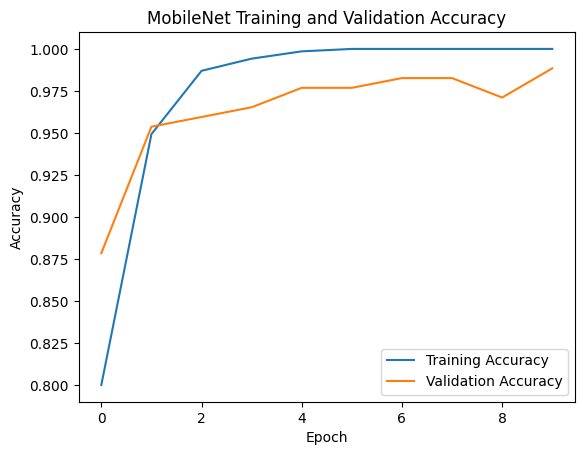

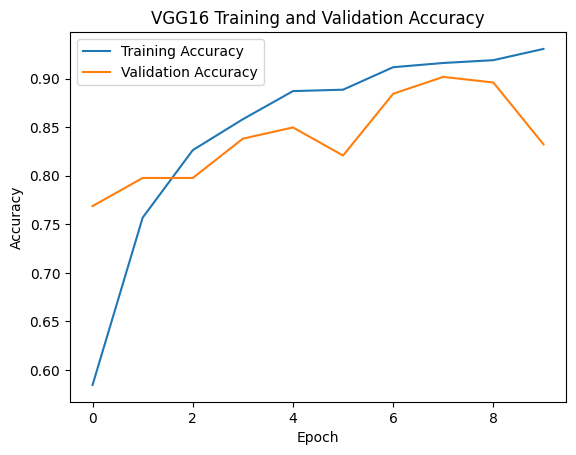

In [12]:
def plot_training_history(history, title):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(title)
    plt.show()

plot_training_history(mobilenet_history, 'MobileNet Training and Validation Accuracy')
plot_training_history(vgg16_history, 'VGG16 Training and Validation Accuracy')


In [14]:
def image_status(image_path, model):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)  
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)

    if prediction[0][0] > 0.5:
        return "Healthy"
    else:
        return "Infected with red rot"

new_image_path = 'unhealthy_173.JPG'
mobilenet_prediction = image_status(new_image_path, mobilenet_model)
vgg16_prediction = image_status(new_image_path, vgg16_model)

print("Prediction for the image using MobileNet:", mobilenet_prediction)
print("Prediction for the image using VGG16:", vgg16_prediction)


1/1 [==============================] - 0s 154ms/step
Prediction for the image using MobileNet: Infected with red rot
Prediction for the image using VGG16: Infected with red rot


In [15]:
import pandas as pd

data = {
    'Model': ['MobileNet', 'VGG16'],
    'Test Accuracy': [mobilenet_test_accuracy, vgg16_test_accuracy]
}

accuracy_df = pd.DataFrame(data)
print(accuracy_df)


       Model  Test Accuracy
0  MobileNet       0.988439
1      VGG16       0.832370
